# **Linear Regression with Gradient Descent: A Comparative Study**  

## **Overview**  
This notebook demonstrates the implementation of **Linear Regression** using three different optimization techniques for gradient descent. The performance of these methods is evaluated against **Scikit-Learn's built-in Linear Regression model** using **Mean Squared Error (MSE)** as the evaluation metric.  

---

## **1. Generating Synthetic Data**  
We create a dataset based on the equation:  
\[
y = 4x - 2 + \text{noise}
\]
- **Noise** is added to simulate real-world data variability.  
- The dataset is split into **80% training data** and **20% testing data** for model evaluation.  
- A scatter plot visualizes the generated noisy data and the **true linear relationship**.  

---

## **2. Implementing Gradient Descent Methods from Scratch**  
We implement three different gradient descent techniques:  

### **a. Batch Gradient Descent (BGD)**  
- Updates model parameters using the **entire dataset** in each iteration.  
- More stable updates but can be computationally expensive for large datasets.  

### **b. Stochastic Gradient Descent (SGD)**  
- Updates parameters using **a single randomly selected data point** in each iteration.  
- Faster but introduces more noise in parameter updates.  

### **c. Mini-Batch Gradient Descent (MBGD)**  
- A hybrid approach that updates parameters using a **small batch** of randomly selected data points.  
- Provides a balance between computational efficiency and update stability.  

Each method is implemented from scratch, and the model parameters (**w, b**) are updated iteratively until convergence.

---

## **3. Training and Evaluating Models**  
- Each model is trained on the **training dataset**.  
- The **Mean Squared Error (MSE)** is computed on the **test dataset** to measure prediction accuracy.  
- The trained models are compared to **Scikit-Learn’s built-in Linear Regression model** for performance benchmarking.  

### **Visualization of Results:**  
- **Cost Function Convergence**:  
  - Line plots show how the cost function decreases over iterations for each optimization method.  
- **Final Model Predictions**:  
  - Plots compare each trained model’s regression line against the **true relationship** in the dataset.  
- **MSE Comparison**:  
  - A **bar chart** presents the MSE values for all models, helping visualize their effectiveness.  

---

## **4. Key Takeaways**  
- **Batch Gradient Descent (BGD)** generally produces stable updates but takes longer to converge.  
- **Stochastic Gradient Descent (SGD)** is faster but introduces more noise in parameter updates.  
- **Mini-Batch Gradient Descent (MBGD)** balances the advantages of both BGD and SGD.  
- **Scikit-Learn’s built-in Linear Regression model** provides a benchmark to compare our implementations.  

This notebook provides a hands-on approach to understanding gradient descent optimization techniques and their real-world applications in **linear regression**.


In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# **Creat Data set**

In [122]:
X = np.random.randn(1000, 1)
Y = 4 * X.flatten() - 2 + np.random.normal(0, 25, size=(1000,))

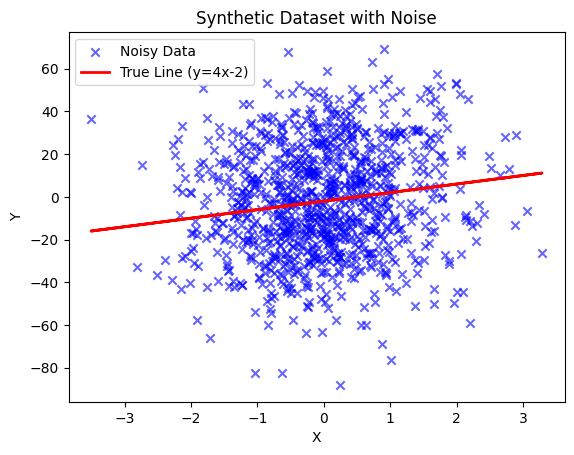

In [123]:
plt.scatter(X, Y, label="Noisy Data", color="blue", alpha=0.6, marker="x") # Changed Y to y
plt.plot(X, 4*X-2, label="True Line (y=4x-2)", color="red", linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Synthetic Dataset with Noise")
plt.show()

In [124]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Cost Function for Linear Regression

This cell defines the `compute_cost` function, which calculates the cost (or error) for a linear regression model.

### Formula:
The cost function for linear regression is given by:

\[
J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2
\]

Where:
- \( m \): Number of training examples.
- \( f_{w,b}(x^{(i)}) = wx^{(i)} + b \): Predicted value for the \( i \)-th example.
- \( y^{(i)} \): Actual value for the \( i \)-th example.
- \( J(w, b) \): Cost (mean squared error scaled by \( \frac{1}{2m} \)).

### Parameters:
- `x`: Input features (independent variable), as a NumPy array or list.
- `y`: Target values (dependent variable), as a NumPy array or list.
- `w`: Weight (slope of the line).
- `b`: Bias (intercept of the line).

### Returns:
- `cost`: The computed cost (a scalar value).


In [125]:
def cost_fun(x, y, w, b):
    m = x.shape[0]
    f_wb = np.dot(x, w) + b
    cost = (1 / (2 * m)) * np.sum((f_wb - y) ** 2)
    return cost

## Gradient Descent Function

This function calculates the gradients of the cost function with respect to `w` and `b`, which are used to update the parameters during optimization.

### Formula:
The gradients are computed as:

\[
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)}) x^{(i)}
\]

\[
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})
\]

### Parameters:
- `x`: Input features.
- `y`: Target values.
- `w`: Weight parameter.
- `b`: Bias parameter.

### Returns:
- `dj_dw`: Derivative of cost with respect to `w`.
- `dj_db`: Derivative of cost with respect to `b`.


In [126]:
def compute_gradient(x,y,w,b):
  m = x.shape[0]
  f_wb = np.dot(x,w) +b
  dj_dw = (1 / m) * np.dot(x.T, (f_wb - y))
  dj_db = (1/m) * np.sum(f_wb -y)
  return dj_dw, dj_db

## Batch Gradient Descent (BGD)

This function implements Batch Gradient Descent (BGD), which updates parameters using the average gradient across the entire dataset.

### Parameters:
- `x`: Input features.
- `y`: Target values.
- `w_in`: Initial weight value.
- `b_in`: Initial bias value.
- `alpha`: Learning rate.
- `iterations`: Number of iterations.
- `cost_fun`: Function to compute cost.
- `compute_gradient`: Function to compute gradients.

### Returns:
- `w`: Final weight after optimization.
- `b`: Final bias after optimization.
- `j_history`: List of cost values over iterations.
- `w_b_history`: List of parameter updates over iterations.


In [127]:
def BGD(x , y , w_in , b_in , alpha , iterations , cost_fun , compute_gradient):
    w = w_in
    b = b_in
    j_history = []
    w_b_history = []

    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        j_history.append(cost_fun(x, y, w, b))
        w_b_history.append([w, b])

    return w, b, j_history, w_b_history

## Stochastic Gradient Descent (SGD)

This function implements Stochastic Gradient Descent (SGD), where parameters are updated after each individual training example.

### Key Difference from BGD:
- Instead of using all training data at once, it updates `w` and `b` for each sample.

### Returns:
- `w`: Final weight after optimization.
- `b`: Final bias after optimization.
- `j_history`: Cost values over iterations.
- `w_b_history`: Parameter updates over iterations.


In [128]:
def SGD(x, y, w_in, b_in, alpha, iterations, cost_fun, compute_gradient):
    w = w_in
    b = b_in
    j_history = []
    w_b_history = []
    m = x.shape[0]

    for i in range(iterations):
        random_index = np.random.randint(m)
        xi = x[random_index]
        yi = y[random_index]


        dj_dw, dj_db = compute_gradient(np.array([xi]), np.array([yi]), w, b)


        w -= alpha * dj_dw
        b -= alpha * dj_db


        cost = cost_fun(x, y, w, b)
        j_history.append(cost)
        w_b_history.append([w, b])

    return w, b, j_history, w_b_history


## Mini-Batch Gradient Descent (MBGD)

This function implements Mini-Batch Gradient Descent (MBGD), which combines the benefits of BGD and SGD by using small subsets of data to update parameters.

### Returns:
- `w`: Final weight after optimization.
- `b`: Final bias after optimization.
- `j_history`: Cost values over iterations.
- `w_b_history`: Parameter updates over iterations.


In [129]:
def MBGD (x , y , w_in , b_in , alpha , iterations , cost_fun , compute_gradient, batch_size=32):
    w = w_in
    b = b_in
    j_history = []
    w_b_history = []
    m = x.shape[0]

    for i in range(iterations):
        permutation = np.random.permutation(m)
        x_shuffled = x[permutation]
        y_shuffled = y[permutation]

        for j in range(0, m, batch_size):
            x_batch = x_shuffled[j:j + batch_size]
            y_batch = y_shuffled[j:j + batch_size]

            if len(x_batch) < batch_size:
                continue

            dj_dw, dj_db = compute_gradient(x_batch, y_batch, w, b)
            w -= alpha * dj_dw
            b -= alpha * dj_db
            j_history.append(cost_fun(x, y, w, b))
            w_b_history.append([w, b])

    return w, b, j_history, w_b_history


## Mean Squared Error (MSE) Function  

This function calculates the **Mean Squared Error (MSE)**, a common metric for evaluating regression models.  

### **Formula:**  
\[
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_{\text{true}}^{(i)} - y_{\text{pred}}^{(i)})^2
\]  

### **Parameters:**  
- `y_true`: Actual target values (ground truth).  
- `y_pred`: Predicted values from the regression model.  

### **Returns:**  
- The **average squared difference** between actual and predicted values, indicating how well the model fits the data.  
- A **lower MSE** means better predictions, while a **higher MSE** indicates poor performance.  


In [130]:
def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

## Training Models and Comparing Optimization Methods

This section runs different gradient descent methods (`BGD`, `SGD`, `MBGD`) and compares their performance with `LinearRegression` from Scikit-Learn.

### Key Steps:
1. Initialize `w` and `b` for all methods.
2. Train models using the defined gradient descent functions.
3. Compute Mean Squared Error (MSE) for each method.
4. Compare performance across methods.


In [131]:
w_BGD, b_BGD, j_his_BGD, w_b_BGD = BGD(
    x_train,
    y_train,
    w_in=np.zeros((1,)),
    b_in=0.0,
    alpha=0.8,
    iterations=1000,
    cost_fun=cost_fun,
    compute_gradient=compute_gradient
)

In [132]:
y_pred_BGD = w_BGD * x_test + b_BGD
mse_BGD = MSE(y_test, y_pred_BGD)
print(f"Mean Squared Error (MSE) for BGD: {mse_BGD}")

Mean Squared Error (MSE) for BGD: 609.8462896850394


In [133]:
w_SGD, b_SGD, j_his_SGD, w_b_SGD = SGD(
    x_train,
    y_train,
    w_in=np.zeros((1,)),
    b_in=0.0,
    alpha=0.8,
    iterations=1000,
    cost_fun=cost_fun,
    compute_gradient=compute_gradient
)

In [134]:
y_pred_SGD = w_SGD * x_test + b_SGD
mse_SGD = MSE(y_test, y_pred_SGD)
print(f"Mean Squared Error (MSE) for BGD: {mse_SGD}")

Mean Squared Error (MSE) for BGD: 1205.2939323161315


In [135]:
w_MBGD, b_MBGD, j_his_MBGD, w_b_MBGD = MBGD(
    x_train,
    y_train,
    w_in=np.zeros((1,)),
    b_in=0.0,
    alpha=0.8,
    iterations=1000,
    cost_fun=cost_fun,
    compute_gradient=compute_gradient
)

In [136]:
y_pred_MBGD = w_MBGD * x_test + b_MBGD
mse_MBGD = MSE(y_test, y_pred_MBGD)
print(f"Mean Squared Error (MSE) for BGD: {mse_MBGD}")

Mean Squared Error (MSE) for BGD: 635.8186804685489


In [137]:
model = LinearRegression()
model.fit(x_train, y_train)
w = model.coef_[0]
b = model.intercept_
y_pred_sklearn = w * x_test + b

In [138]:
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(f"Mean Squared Error (MSE) for Bulit in GD: {mse_sklearn}")

Mean Squared Error (MSE) for Bulit in GD: 585.9502811200589


## Comparison of Different Gradient Descent Methods  

This visualization compares the performance of four different optimization methods in fitting a linear regression model. Each subplot shows the predicted regression line for a specific method against the true relationship.

### **Subplots:**
1. **Batch Gradient Descent (BGD) vs. True Relationship**  
2. **Stochastic Gradient Descent (SGD) vs. True Relationship**  
3. **Mini-Batch Gradient Descent (MBGD) vs. True Relationship**  
4. **Built-in Gradient Descent (Scikit-Learn) vs. True Relationship**  

### **Plot Elements:**
- **Blue scatter points**: Represent noisy data points.  
- **Colored solid lines**: Show the predicted regression line for each optimization method.  
- **Green dashed line**: Represents the true relationship \( y = 4x - 2 \).  

### **Purpose:**
This comparison helps analyze how well each optimization method approximates the true function and highlights differences in convergence and accuracy.


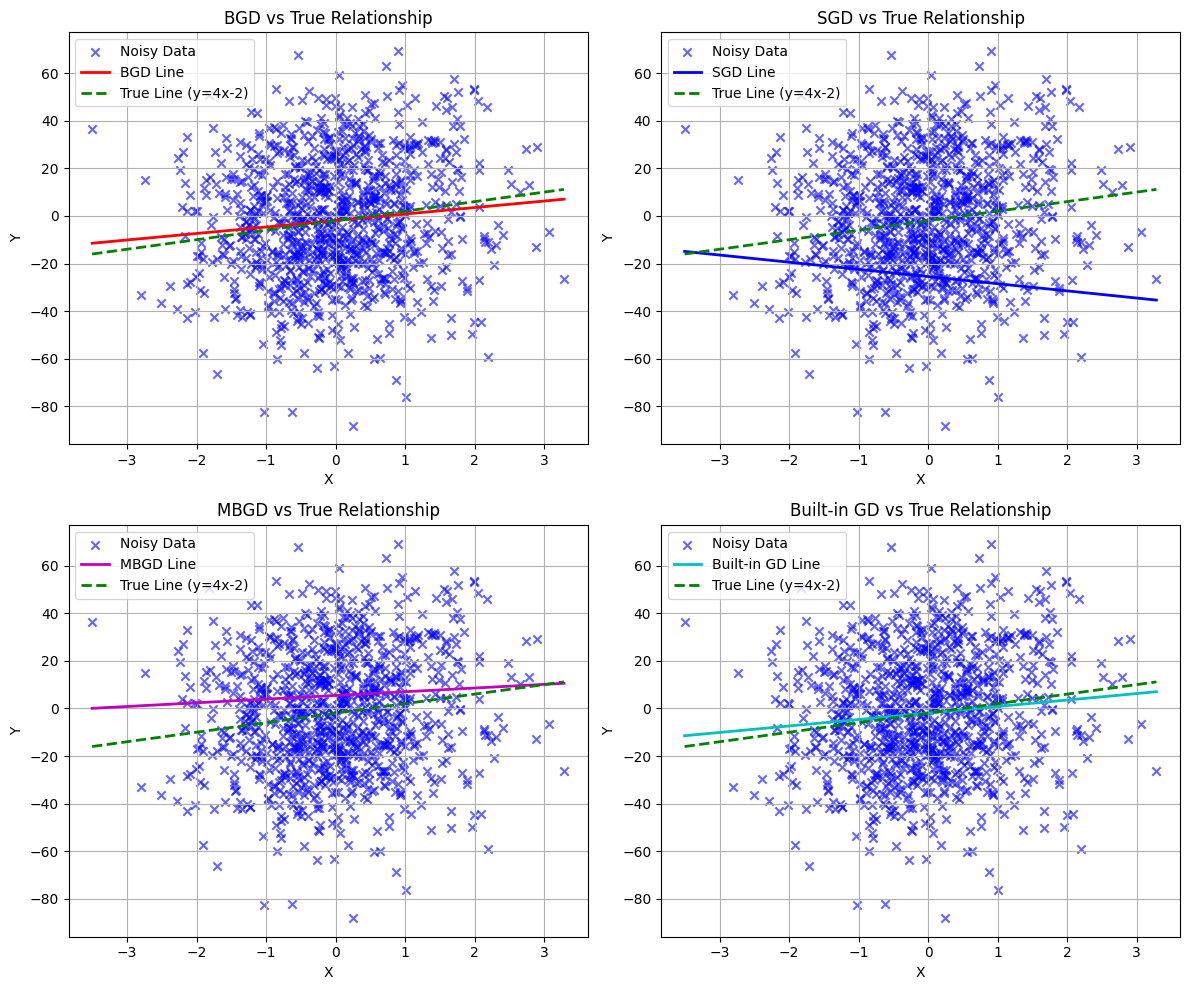

In [139]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
titles = ["BGD vs True Relationship", "SGD vs True Relationship",
          "MBGD vs True Relationship", "Built-in GD vs True Relationship"]
weights = [(w_BGD, b_BGD), (w_SGD, b_SGD), (w_MBGD, b_MBGD), (w, b)]
colors = ['r-', 'b-', 'm-', 'c-']
labels = ["BGD Line", "SGD Line", "MBGD Line", "Built-in GD Line"]

x_line = np.array([np.min(X), np.max(X)])
y_true_line = 4 * x_line - 2

for ax, (w_i, b_i), title, color, label in zip(axes.flat, weights, titles, colors, labels):
    ax.scatter(X, Y, label="Noisy Data", color="blue", alpha=0.6, marker="x")
    y_line = w_i * x_line + b_i
    ax.plot(x_line, y_line, color, label=label, linewidth=2)
    ax.plot(x_line, y_true_line, 'g--', label="True Line (y=4x-2)", linewidth=2)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()
    ax.set_title(title)
    ax.grid(True)

plt.tight_layout()
plt.show()


## Cost Function Convergence Plots

These plots show how the cost function evolves over iterations for different optimization methods:

- **BGD**: Uses all training data per update.
- **SGD**: Uses one sample per update.
- **MBGD**: Uses small batches per update.

### Interpretation:
- The cost should decrease over time.
- If the cost fluctuates significantly in SGD, it may be due to noisy updates.


In [140]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(rows=3, cols=1, subplot_titles=["Cost for BGD", "Cost for SGD", "Cost for MBGD"])

costs = [j_his_BGD, j_his_SGD, j_his_MBGD]
colors = ['red', 'blue', 'magenta']
methods = ["BGD", "SGD", "MBGD"]


for i, (J_hist, color, method) in enumerate(zip(costs, colors, methods), start=1):
    fig.add_trace(
        go.Scatter(y=J_hist, mode='lines', name=f"Cost {method}", line=dict(color=color)),
        row=i, col=1
    )


fig.update_layout(
    title_text="Cost Comparison for Different Optimization Methods",
    height=800,
    showlegend=False
)

fig.show()


## Parameter Convergence Plots

These plots show how `w` and `b` evolve over iterations for different optimization methods.

### Insights:
- Smooth convergence suggests stable learning.
- Large fluctuations may indicate high learning rate.


In [141]:
fig = go.Figure()
methods = ["BGD", "SGD", "MBGD", "Scikit-Learn"]
w_values = [float(w_BGD), float(w_SGD), float(w_MBGD), float(w)]
b_values = [float(b_BGD), float(b_SGD), float(b_MBGD), float(b)]


fig.add_trace(go.Bar(
    x=methods,
    y=w_values,
    name="w",
    marker_color="red",
    text=[f"{w:.4f}" for w in w_values],
    textposition="auto"
))


fig.add_trace(go.Bar(
    x=methods,
    y=b_values,
    name="b",
    marker_color="green",
    text=[f"{b:.4f}" for b in b_values],
    textposition="auto"
))


fig.update_layout(
    title="Final w and b Comparison for Different Methods",
    xaxis_title="Optimization Methods",
    yaxis_title="Parameter Values",
    barmode="group",
    hovermode="x",
)


fig.show()


<ipython-input-141-fbbda799399b>:3: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



## **Final Model Comparison: Mean Squared Error (MSE)**  

This section evaluates the performance of different optimization methods by comparing their **Mean Squared Error (MSE)** values. A lower MSE indicates a better fit to the data.

### **Printed Output:**
- Displays the MSE values for:
  - **Batch Gradient Descent (BGD)**
  - **Stochastic Gradient Descent (SGD)**
  - **Mini-Batch Gradient Descent (MBGD)**
  - **Scikit-Learn's Built-in Linear Regression**

### **Bar Chart Visualization:**
- **X-axis**: Different optimization methods.  
- **Y-axis**: Corresponding MSE values.  
- **Colored bars**: Represent the MSE values of each method.  
- **Grid lines & labels**: Improve readability by displaying MSE values above each bar.

### **Purpose:**
This comparison helps assess which optimization method produces the lowest error and provides the best approximation of the true relationship.


Final Model Comparison:
Batch Gradient Descent (BGD) MSE: 609.8463
Stochastic Gradient Descent (SGD) MSE: 1205.2939
Mini-Batch Gradient Descent (MBGD) MSE: 635.8187
Scikit-Learn Linear Regression MSE: 585.9503



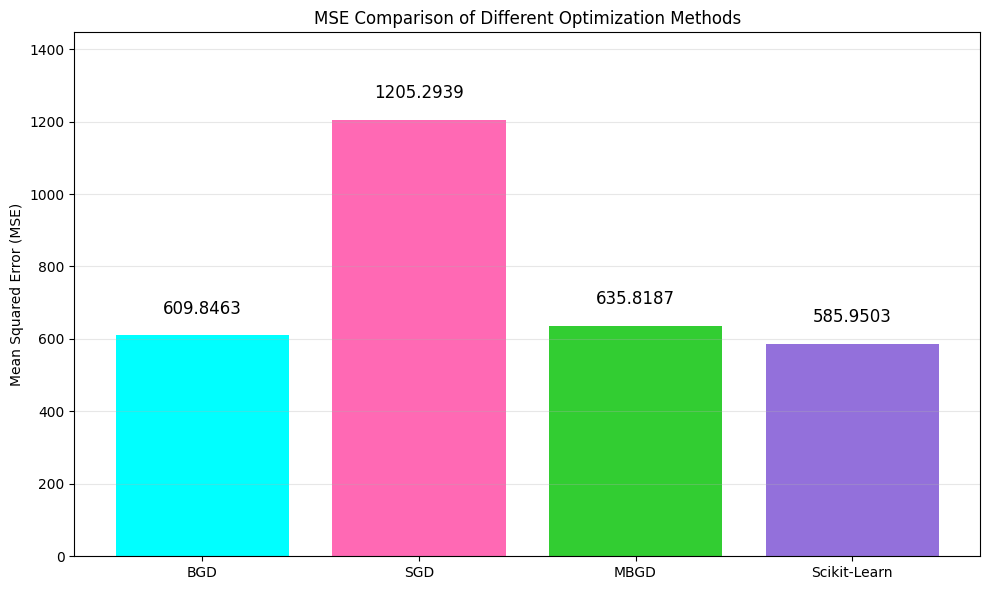

In [142]:
print("Final Model Comparison:")
print("=" * 50)
print(f"Batch Gradient Descent (BGD) MSE: {mse_BGD:.4f}")
print(f"Stochastic Gradient Descent (SGD) MSE: {mse_SGD:.4f}")
print(f"Mini-Batch Gradient Descent (MBGD) MSE: {mse_MBGD:.4f}")
print(f"Scikit-Learn Linear Regression MSE: {mse_sklearn:.4f}")
print("=" * 50 + "\n")


plt.figure(figsize=(10, 6))
methods = ['BGD', 'SGD', 'MBGD', 'Scikit-Learn']
mse_values = [mse_BGD, mse_SGD, mse_MBGD, mse_sklearn]
colors = ['#00FFFF', '#FF69B4', '#32CD32', '#9370DB']

plt.bar(methods, mse_values, color=colors)
plt.title('MSE Comparison of Different Optimization Methods')
plt.ylabel('Mean Squared Error (MSE)')
plt.ylim([0, max(mse_values) * 1.2])
plt.grid(True, alpha=0.3, axis='y')


for i, v in enumerate(mse_values):
    plt.text(i, v + (max(mse_values) * 0.05), f'{v:.4f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()